In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# cross_validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

# # модели
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# метрики
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


import warnings
warnings.filterwarnings("ignore")


In [2]:
from sklearn.datasets import load_iris
data = load_iris(return_X_y=True, as_frame=True)
df = data[0]
df['class'] = data[1]

# 1. Логистическая регрессия. Бинарная классификация

***1. Данные уже подготовлены, возьмем только 2 класса и посмотрим на распределение***

In [3]:
df_bin = df[df['class']!=2]
df_bin['class'][df_bin['class']==0] = -1

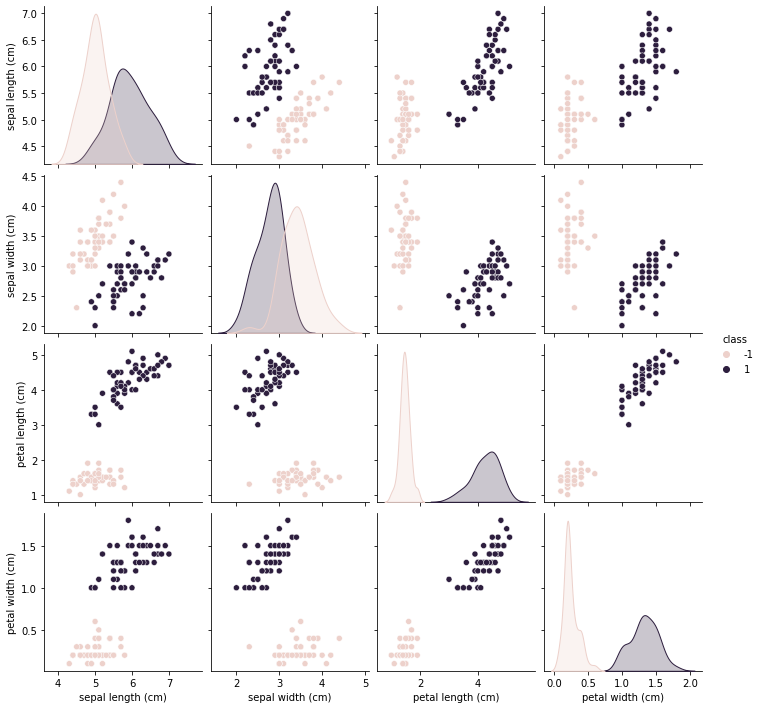

In [6]:
import seaborn as sns
sns.pairplot(df_bin, hue='class')

Как видно, признаки неперекрывают друг друга, поэтому предсказатель будет идеальным

In [5]:
df_bin.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.205926,0.812458,0.789608,0.728290
sepal width (cm),-0.205926,1.000000,-0.602663,-0.570883,-0.690684
petal length (cm),0.812458,-0.602663,1.000000,0.979322,0.969990
petal width (cm),0.789608,-0.570883,0.979322,1.000000,0.960307
class,0.728290,-0.690684,0.969990,0.960307,1.000000


***2. Напишем свой класс логистической регрессии***

In [7]:
class MyLogLoss:
    
    def __init__(self, n_steps = 100, lr = 0.001):
        self.n_steps = n_steps
        self.lr = lr
        self.Loss = []
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.X = np.hstack((np.ones((X.shape[0],1)), self.X))
        self.w = np.random.rand(self.X.shape[1],1) 
        
        for i in np.arange(self.n_steps):
            self.Loss.append(self.LogLoss(self.w))
            self.w -= self.grad(self.w)*self.lr;
        
    def grad(self, w):
        return self.X.T @ (1/(1 + np.exp(-self.X @ w * self.y)) * np.exp(-self.X @ w * self.y) * (-self.y))
#         return 1/l * np.sum(((y - 1) * X.T + 1/(1 + np.exp(-w @ X.T)) * np.exp(-w @ X.T)*(X.T)), axis=1) если y[l], w[l], X[l,n]
    
    def LogLoss(self, w):
        return np.sum(1 + np.exp(-self.X @ w))
    
    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0],1)), X))
        return X @ self.w
    

***3. Обучим модель***

In [9]:
X = df_bin.iloc[:,:4].values
y = df_bin.iloc[:,-1].values[:,np.newaxis]
X_train, X_test, y_tran, y_test = train_test_split(X,y,train_size=0.8)
clf = MyLogLoss()
clf.fit(X_train, y_tran)
y_pred = clf.predict(X_test)

In [10]:
y_pred

array([[-3.04743477],
       [-2.64555615],
       [ 3.01312868],
       [-2.09524551],
       [ 3.33858126],
       [ 1.9033505 ],
       [-1.90401829],
       [ 2.87995611],
       [ 2.46338259],
       [-2.72688298],
       [ 3.20116383],
       [-1.84433504],
       [-1.94753455],
       [ 3.17781153],
       [-2.67119297],
       [-2.18530241],
       [-2.46405038],
       [-2.07736608],
       [ 2.56014037],
       [ 2.61942303]])

In [11]:
def ans(y_pred, hold):
    y_pred1 = np.copy(y_pred)
    y_pred1[y_pred >= hold] = 1
    y_pred1[y_pred < hold] = -1
    return y_pred1
    
def scores(y_test, y_pred):
    
    print(f'accuracy = {accuracy_score(y_test, ans(y_pred, 0))}\n\
f1_score = {f1_score(y_test, ans(y_pred, 0))}\n\
roc_auc_score = {roc_auc_score(y_test, y_pred)}')
    
    fig, ax = plt.subplots(1,2, figsize=(14,7))
    ax[0].plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1])
    ax[0].set_title('ROC_AUC')
    ax[0].set_ylabel('tpr')
    ax[0].set_xlabel('fpr')
    ax[1].plot(precision_recall_curve(y_test, y_pred)[1], precision_recall_curve(y_test, y_pred)[0])
    ax[1].set_title('precision_recall')
    ax[1].set_ylabel('prec')
    ax[1].set_xlabel('rec')

accuracy = 1.0
f1_score = 1.0
roc_auc_score = 1.0


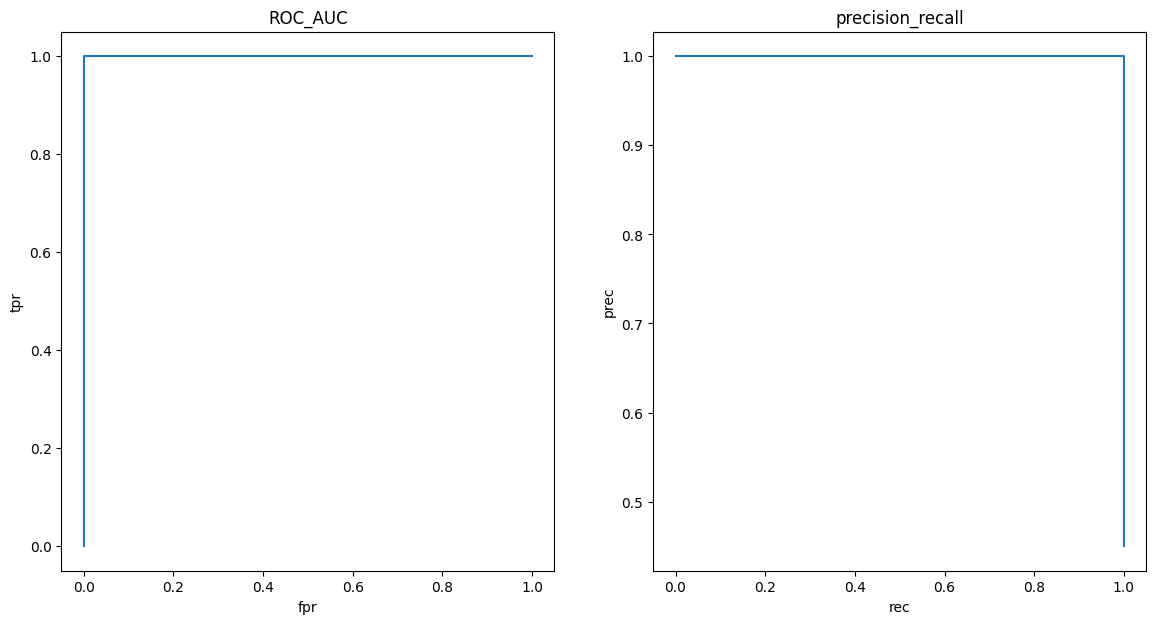

In [12]:
scores(y_test, y_pred)


Как видно, наш классификатор смог провести идеальную гиперплоскость, что и не удивительно.

***4. Возьмем перекрывающиеся классы.***

In [13]:
df_bin = df[df['class']!=0]
df_bin['class'][df_bin['class']==1] = -1
df_bin['class'][df_bin['class']==2] = 1

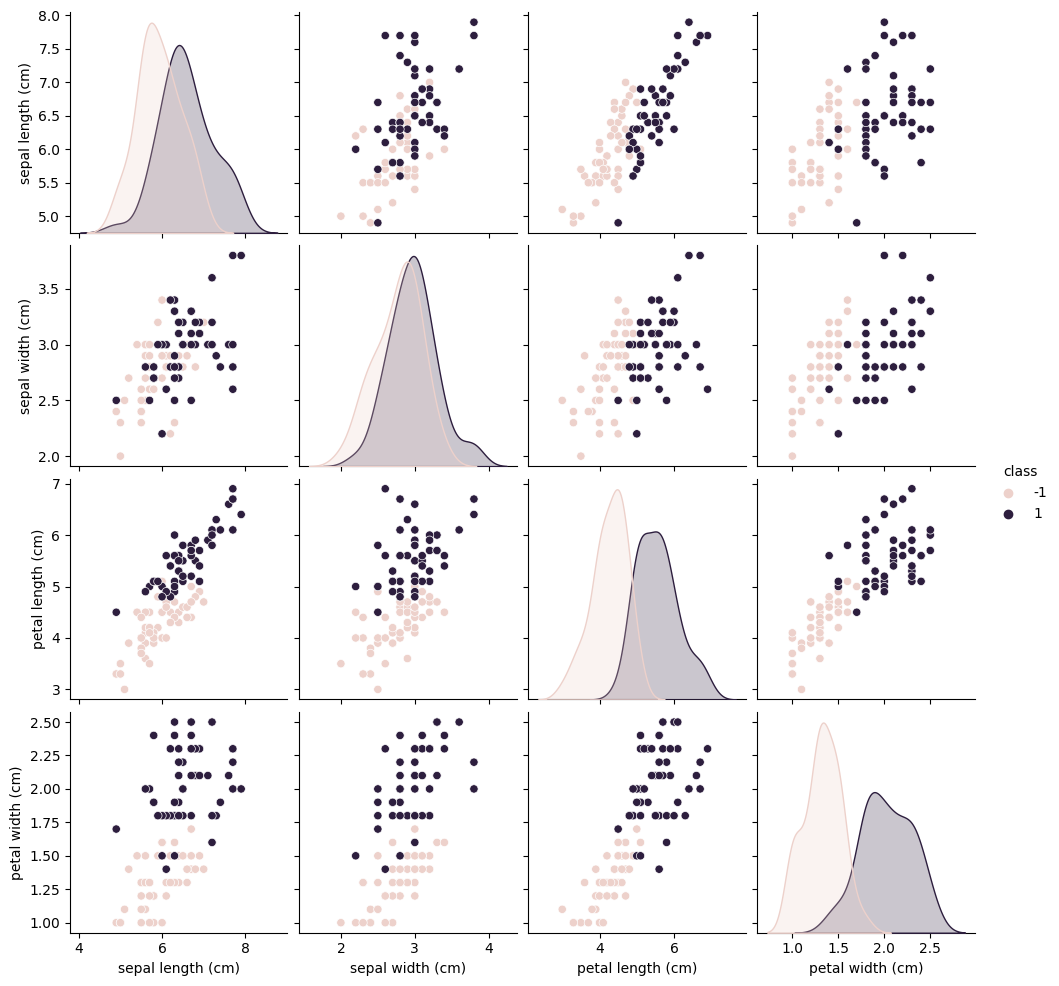

In [14]:
import seaborn as sns
sns.pairplot(df_bin, hue='class')

In [15]:
X = df_bin.iloc[:,:4].values
y = df_bin.iloc[:,-1].values[:,np.newaxis]
X_train, X_test, y_tran, y_test = train_test_split(X,y,train_size=0.6)
clf = MyLogLoss()
clf.fit(X_train, y_tran)
y_pred = clf.predict(X_test)


accuracy = 0.9
f1_score = 0.909090909090909
roc_auc_score = 0.9774436090225564


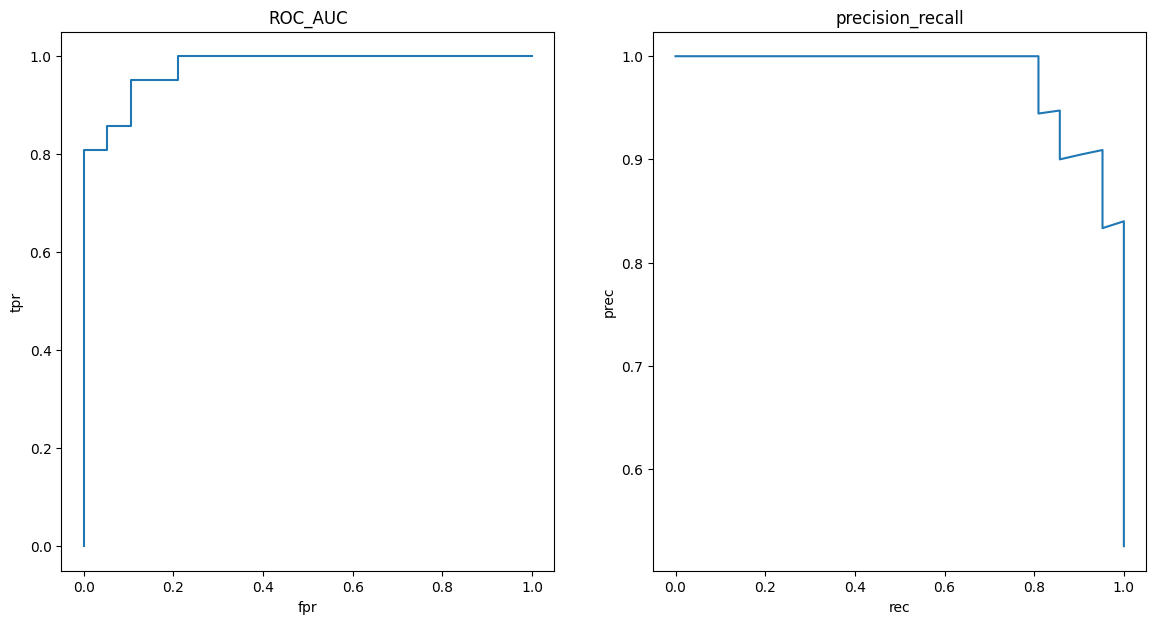

In [16]:
scores(y_test, y_pred)

Вывод: Модель все равно достаточно хорошо проводит гиперплоскость.

***5. Проделаем то же с библиотекой.***

In [19]:
X = df_bin.iloc[:,:4].values
y = df_bin.iloc[:,-1].values[:,np.newaxis]
X_train, X_test, y_tran, y_test = train_test_split(X,y,train_size=0.6)
clf = LogisticRegression()
clf.fit(X_train, y_tran)
y_pred = clf.predict(X_test)

In [21]:
clf.decision_function(X_test)

array([ 2.2758237 ,  1.50296072, -1.35489964,  3.7867099 , -1.97293937,
       -1.44004338,  2.49201477, -2.61821592, -1.66864753,  1.79723711,
       -0.42856265,  0.7118131 ,  0.54271063,  2.67547775, -1.08520389,
       -3.12488284, -0.02071885,  6.50410752,  4.2225123 ,  2.39112064,
        0.39307781,  0.52873041, -0.50825576, -1.12422447,  3.75951373,
       -0.13479014, -1.15818007, -2.39100165,  2.80698831,  3.2927957 ,
       -2.9866147 , -1.08735434,  4.7117806 , -1.14335448, -0.00758399,
        0.82803484,  0.89370893,  4.7095472 ,  0.30946057,  1.80809793])

accuracy = 0.95
f1_score = 0.9545454545454546
roc_auc_score = 0.9671717171717171


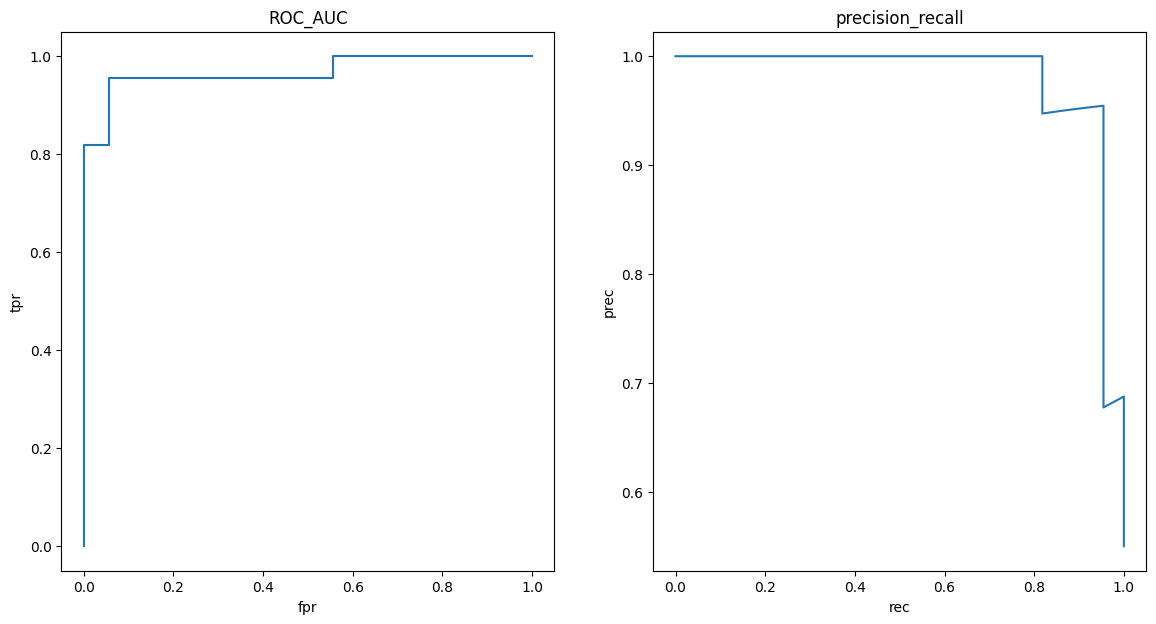

In [22]:
scores(y_test, clf.decision_function(X_test)) 

In [23]:
#Выдает классы
print(clf.predict(X_test)[:5])
#Выдает вероятности принадлежности к классам
print(clf.predict_proba(X_test)[:5])
#Выдает margine
print(clf.decision_function(X_test)[:5])

[ 1  1 -1  1 -1]
[[0.09314512 0.90685488]
 [0.18198436 0.81801564]
 [0.79492951 0.20507049]
 [0.02216753 0.97783247]
 [0.87792648 0.12207352]]
[ 2.2758237   1.50296072 -1.35489964  3.7867099  -1.97293937]


***6. Посмотрим на кросс-валидацию***

In [24]:
CV = cross_validate(LogisticRegression(), X,y, cv=KFold(5, shuffle=True), scoring='roc_auc')
CV['test_score'].mean()


0.9976190476190476

In [25]:
CV1 = LogisticRegressionCV(Cs=5, cv=KFold(5, shuffle=True)).fit(X,y)
CV1.scores_

{1: array([[0.45, 0.9 , 0.95, 1.  , 1.  ],
        [0.4 , 0.8 , 0.95, 0.95, 0.9 ],
        [0.45, 0.85, 0.95, 0.95, 0.95],
        [0.45, 0.9 , 0.95, 1.  , 1.  ],
        [0.35, 0.75, 0.95, 0.95, 0.95]])}